In [242]:
import os 
import pandas as pd
import numpy as np
import re 
import string
import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [70]:
data = pd.read_csv('twitter.csv', encoding='utf-8')
train_data = pd.read_csv('train.csv', encoding='utf-8')
print(f"Number of data points: data : {data.shape[0]}, train : {train_data.shape[0]}",'\n')

Number of data points: data : 2000, train : 5970 



In [72]:
data['tweet']

0       I know there are a lot of you who need to see ...
1        https://youtu.be/3n1YlLIzQy4  Watch Aaron try...
2       Going to try another one... #Mandalorian #3Dpr...
3       Instead of doing a #TBThursday Today I will de...
4       Yes. It is what it is. 😂🤣💗\nBut so worth it! \...
                              ...                        
1995    What’s better: Star Wars or Porsche? @porsche ...
1996    Hey it's #sithlistsunday, kick back and drink ...
1997    And I love Mando so much, it's only been 3 epi...
1998    Last day at @steelcitycomiccon ! Our music she...
1999    No one told me that #Mandalorian is basically ...
Name: tweet, Length: 2000, dtype: object

In [73]:
train_data = train_data[['Category', 'Tweet']]
train_data.rename(columns={'Category': 'emotion'}, inplace=True)
train_data = train_data[train_data['emotion'] != 'Tweet']
train_data

,emotion,Tweet
0,negative,Not Available
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
...,...,...
5965,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,neutral,Rib injury for Zlatan against Russia is a big ...
5967,neutral,Noooooo! I was hoping to see Zlatan being Zlat...
5968,neutral,Not Available


## Count Train 

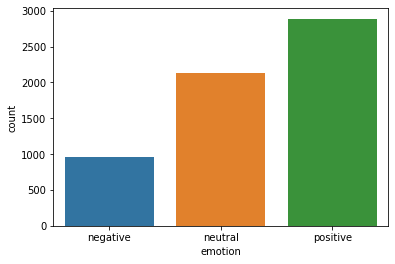

In [74]:
sns.countplot(x='emotion',data=train_data)

In [75]:
# remove the tweets which contains Not available
train_data = train_data[train_data['Tweet'] != "Not Available"]
train_data

,emotion,Tweet
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
5,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu..."
...,...,...
5963,positive,"Ok ed let's do this, Zlatan, greizmann and Lap..."
5964,neutral,Goal level: Zlatan 90k by Friday? = Posting e...
5965,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,neutral,Rib injury for Zlatan against Russia is a big ...


## Preprocess

In [76]:
def Clean(dataframe):
    #Remove non ASCII characters:
    dataframe = dataframe.encode('ascii','ignore')
    dataframe = dataframe.decode('utf8')
    
    #Remove URLs : 
    dataframe = re.sub('http\S+\s*','',dataframe)  
    
    
    #removing mentions:
    dataframe = re.sub('rt|cc','',dataframe) #Remove RT and cc
    dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
    
    dataframe = dataframe.lower() #Converting to lowercase
    dataframe = re.sub(r'\d+', '', dataframe) #Removing numbers
    dataframe = re.sub(r'[^a-zA-Z0-9\s]', '', dataframe) #Removing punctuations
    dataframe = dataframe.strip() #remove white spaces
    dataframe = re.sub('pictw\S+\s*','',dataframe)
    
    #Tokenize: 
    word_tokens = word_tokenize(dataframe)
    
    #Words stops
    stop_words=set(stopwords.words('english'))

    filtered_tweet = []
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
     
    return ' '.join(filtered_tweet)

## Clean data input 

In [117]:
data_clean = data['tweet'].apply(Clean)
data_clean

0                                 know lot need see today
1       watch aaron try hand bounty hunting game bount...
2                                   going try another one
3          instead today dedicate baby yoda hes damn cute
4                                                 yes woh
                              ...                        
1995               whats better star wars porsche porsche
1996    hey kick back drink bone broth like tune ep ts...
1997    love mando much episodes something happens im ...
1998    last day steelcitycomion music sheets make gre...
1999    one told basically mando adopting baby yoda pr...
Name: tweet, Length: 2000, dtype: object

## Clean data train 

In [118]:
train_data_clean = train_data['Tweet'].apply(Clean)

In [215]:
train_data_clean

1       ios app transpo security mm need check rd pay ...
2                             mar ios device download app
3       jimmievanagon phone run latest ios may aount p...
4       sure sta publication ios well live helping ask...
5       two dollar tuesday forklift quickkey ios suite...
                              ...                        
5963    ok ed lets zlatan greizmann lapoe tomorrow mak...
5964    goal level zlatan k friday posting every day v...
5965    youaremyarsenal wouldnt surprise enquiredhe ca...
5966    rib injury zlatan russia big blow misses austr...
5967    noooooo hoping see zlatan zlatan tuesday oh we...
Name: Tweet, Length: 5421, dtype: object

## Classifier

In [253]:
#Vectorizer : 
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(train_data_clean)
Y_train = train_data['emotion']
X_test = count_vectorizer.transform(data_clean)

print(X_train.shape, Y_train.shape, X_test.shape)

(5421, 12592) (5421,) (2000, 12592)


### Naive Bayes :

In [301]:
def NB(X_train, X_test, Y_train):

    # fit the training dataset on the NB classifier
    Naive = MultinomialNB()
    Naive.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_NB = Naive.predict(X_test)
    
    #print(predictions_NB)
    print(f" emotion positive : {list(predictions_NB).count('positive')} , negative : {list(predictions_NB).count('negative')} , neutral : {list(predictions_NB).count('neutral')} " )
    return predictions_NB

In [307]:
predictions_NB = NB(X_train, X_test, Y_train)

 emotion positive : 1566 , negative : 99 , neutral : 335 


### SVM :

In [281]:
def SVM(X_train, X_test, Y_train):
    
    SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(X_test)

    #print(predictions_SVM)
    print(f" emotion positive : {list(predictions_SVM).count('positive')} , negative : {list(predictions_SVM).count('negative')} , neutral : {list(predictions_SVM).count('neutral')}" )
    return predictions_SVM 

In [282]:
predictions_SVM = SVM(X_train, X_test, Y_train )

 emotion positive : 1156 , negative : 260 , neutral : 584


### Random Forest Classifier

In [283]:
def RFC(X_train, X_test, Y_train):
    
    RFC = RandomForestClassifier(n_estimators=1000, random_state=0)
    RFC.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_RFC = RFC.predict(X_test)

    print(f" emotion positive : {list(predictions_RFC).count('positive')} , negative : {list(predictions_RFC).count('negative')}, neutral : {list(predictions_RFC).count('neutral')} " )
    return predictions_RFC 

In [284]:
predictions_RFC = RFC(X_train, X_test, Y_train )

 emotion positive : 1841 , negative : 5, neutral : 154 


### Logistic Regression 

In [285]:
def LR(X_train, X_test, Y_train ):
    
    logreg = LogisticRegression(solver='liblinear', multi_class='auto')
    logreg.fit(X_train, Y_train)

    # predict the labels on validation dataset
    predictions_LR = logreg.predict(X_test)

    print(f" emotion positive : {list(predictions_LR).count('positive')} , negative : {list(predictions_LR).count('negative')} , neutral : {list(predictions_LR).count('neutral')}" )
    return predictions_LR 

In [286]:
predictions_LR = LR(X_train, X_test, Y_train )

 emotion positive : 1343 , negative : 134 , neutral : 523


### Calcul

In [360]:
nb_NB = predictions_NB.shape[0]
positive_NB = list(predictions_NB).count('positive')
negative_NB = list(predictions_NB).count('negative')
neutral_NB = list(predictions_NB).count('neutral')
print("NB :")
print((positive_NB/nb_NB)*100, (negative_NB/nb_NB)*100, (neutral_NB/nb_NB)*100)

nb_SVM = predictions_SVM.shape[0]
positive_SVM = list(predictions_SVM).count('positive')
negative_SVM = list(predictions_SVM).count('negative')
neutral_SVM = list(predictions_SVM).count('neutral')
print("SVM :")
print((positive_SVM/nb_SVM)*100, (negative_SVM/nb_SVM)*100, (neutral_SVM/nb_SVM)*100)

nb_RFC = predictions_RFC.shape[0]
positive_RFC = list(predictions_RFC).count('positive')
negative_RFC = list(predictions_RFC).count('negative')
neutral_RFC = list(predictions_RFC).count('neutral')
print("RFC :")
print((positive_RFC/nb_RFC)*100, (negative_RFC/nb_RFC)*100, (neutral_RFC/nb_RFC)*100)

nb_LR = predictions_LR.shape[0]
positive_LR = list(predictions_LR).count('positive')
negative_LR = list(predictions_LR).count('negative')
neutral_LR = list(predictions_LR).count('neutral')
print("LR :")
print((positive_LR/nb_LR)*100, (negative_LR/nb_LR)*100, (neutral_LR/nb_LR)*100)

print("Average :")
print((((positive_NB/nb_NB)+(positive_SVM/nb_SVM)+(positive_RFC/nb_RFC)+(positive_LR/nb_LR))/4)*100, (((negative_NB/nb_NB)+(negative_SVM/nb_SVM)+(negative_RFC/nb_RFC)+(negative_LR/nb_LR))/4)*100, (((neutral_NB/nb_NB)+(neutral_SVM/nb_SVM)+(neutral_RFC/nb_RFC)+(neutral_LR/nb_LR))/4)*100)


NB :
78.3 4.95 16.75
SVM :
57.8 13.0 29.2
RFC :
92.05 0.25 7.7
LR :
67.15 6.7 26.150000000000002
Average :
73.825 6.225 19.950000000000003
